# Temática del Proyecto
Precios de alojamientos de Airbnb
# Descripción de la temática
En el vertiginoso ritmo del mundo actual, la manera en que viajamos y encontramos alojamiento ha sido revolucionada por plataformas como Airbnb. Este dinámico mercado ha empoderado tanto a los propietarios de inmuebles como a los viajeros, al ofrecer una vasta gama de opciones para hospedarse. No obstante, un desafío constante sigue siendo establecer el precio óptimo para un anuncio. Los anfitriones buscan maximizar sus ingresos manteniendo precios competitivos, mientras que los huéspedes anhelan obtener la mejor relación calidad-precio. Encontrar un equilibrio entre estos intereses puede ser un reto, lo que subraya la relevancia de la predicción de precios en Airbnb.
El Dataset ofrece registros de distintos hospedajes en las ciudades más importantes de EEUU, relevando además precios; tipo de propiedad y habitación; comodidades; cantidad de baños, dormitorios y camas; y detalles de reseñas entre otros datos.
# Objetivo
Con este cuadro de situación, se analizarán los precios en función de distintas variables alcanzadas en el Dataset con el fin de poder determinar ciertas relaciones, patrones y/o tendencias con el objetivo de poder predecir los precios de los alojamientos. Se investigará el grado de influencia sobre los precios que ponderan las variables como tipo de habitación y/o propiedad, puntuación del alojamiento, ciudad o cantidad de camas y/o baños que presenta el hospedaje.

## Importación

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression , Ridge , Lasso, RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from xgboost import XGBRegressor

url = 'https://raw.githubusercontent.com/rodrigomartin129/Curso-Data-Science-I/master/Dataset/Airbnb_Data.csv'
df = pd.read_csv(url, index_col=0)

## Información del dataset
### Vista de los datos

In [2]:
df.head(10)

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
id,,,,,,,,,,,,,,,,,,,,,
6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0
12422935,4.442651,Apartment,Private room,"{TV,""Wireless Internet"",Heating,""Smoke detecto...",2,1.0,Real Bed,strict,True,SF,...,37.753164,-122.429526,Comfort Suite San Francisco,Noe Valley,3,100.0,https://a0.muscache.com/im/pictures/82509143-4...,94131,1.0,1.0
11825529,4.418841,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",3,1.0,Real Bed,moderate,True,LA,...,33.980454,-118.462821,Beach Town Studio and Parking!!!11h,NaN,15,97.0,https://a0.muscache.com/im/pictures/4c920c60-4...,90292,1.0,1.0
13971273,4.787492,Condominium,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Wheelchair...",2,1.0,Real Bed,moderate,True,LA,...,34.046737,-118.260439,"Near LA Live, Staple's. Starbucks inside. OWN ...",Downtown,9,93.0,https://a0.muscache.com/im/pictures/61bd05d5-c...,90015,1.0,1.0
180792,4.787492,House,Private room,"{TV,""Cable TV"",""Wireless Internet"",""Pets live ...",2,1.0,Real Bed,moderate,True,SF,...,37.781128,-122.501095,Cozy Garden Studio - Private Entry,Richmond District,159,99.0,https://a0.muscache.com/im/pictures/0ed6c128-7...,94121,1.0,1.0


### Forma

In [3]:
df.shape

(74111, 28)

In [4]:
df.columns

Index(['log_price', 'property_type', 'room_type', 'amenities', 'accommodates',
       'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'description', 'first_review', 'host_has_profile_pic',
       'host_identity_verified', 'host_response_rate', 'host_since',
       'instant_bookable', 'last_review', 'latitude', 'longitude', 'name',
       'neighbourhood', 'number_of_reviews', 'review_scores_rating',
       'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

#### El dataset contiene 28 columnas más el identificador y 74111 registros
##### El **índice** se compone por:
-  0 - **id:** Identificador único
-  1 - **log_price:** Registro detallado del precio
-  2 - **property_type:** Tipo de propiedad
-  3 - **room_type:** Tipo de habitación
-  4 - **amenities:** Comodidades
-  5 - **accommodates:** Espacios
-  6 - **bathrooms:** Baños
-  7 - **bed_type:** Tipo de cama
-  8 - **cancellation_policy:** Política de cancelación
-  9 - **cleaning_fee:** Cargo por limpieza
- 10 - **city:** Ciudad
- 11 - **description:** Descripción
- 12 - **first_review:** Primera reseña
- 13 - **host_has_profile_pic:** El anfitrión tiene foto de perfil
- 14 - **host_identity_verified:** Identidad del anfitrión verificada
- 15 - **host_response_rate:** Tasa de respuesta del anfitrión
- 16 - **host_since:** Anfitrión desde
- 17 - **instant_bookable:** Reserva instantánea
- 18 - **last_review:** Última reseña
- 19 - **latitude:** Latitud
- 20 - **longitude:** Longitud
- 21 - **name:** Nombre
- 22 - **neighbourhood:** Barrio
- 23 - **number_of_reviews:** Número de reseñas
- 24 - **review_scores_rating:** Puntuación de reseñas
- 25 - **thumbnail_url:** Imagen de perfil
- 26 - **zipcode:** Código postal
- 27 - **bedrooms:** Dormitorios
- 28 - **beds:** Camas

### Información General del Dataframe por cada columna

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74111 entries, 6901257 to 3534845
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   log_price               74111 non-null  float64
 1   property_type           74111 non-null  object 
 2   room_type               74111 non-null  object 
 3   amenities               74111 non-null  object 
 4   accommodates            74111 non-null  int64  
 5   bathrooms               73911 non-null  float64
 6   bed_type                74111 non-null  object 
 7   cancellation_policy     74111 non-null  object 
 8   cleaning_fee            74111 non-null  bool   
 9   city                    74111 non-null  object 
 10  description             74111 non-null  object 
 11  first_review            58247 non-null  object 
 12  host_has_profile_pic    73923 non-null  object 
 13  host_identity_verified  73923 non-null  object 
 14  host_response_rate      55812 non-n

## Descripción General y EDA

In [6]:
df.describe().round(1)

,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,74111.0,74111.0,73911.0,74111.0,74111.0,74111.0,57389.0,74020.0,73980.0
mean,4.8,3.2,1.2,38.4,-92.4,20.9,94.1,1.3,1.7
std,0.7,2.2,0.6,3.1,21.7,37.8,7.8,0.9,1.3
min,0.0,1.0,0.0,33.3,-122.5,0.0,20.0,0.0,0.0
25%,4.3,2.0,1.0,34.1,-118.3,1.0,92.0,1.0,1.0
50%,4.7,2.0,1.0,40.7,-77.0,6.0,96.0,1.0,1.0
75%,5.2,4.0,1.0,40.7,-74.0,23.0,100.0,1.0,2.0
max,7.6,16.0,8.0,42.4,-71.0,605.0,100.0,10.0,18.0


Las columnas que presentaron mínimos igual a 0 son:
- 1. log_price: Registro detallado del precio
- 6. bathrooms: Baños
- 23. number_of_reviews: Número de reservas
- 27. bedrooms: Dormitorios
- 28. beds: Camas
    
Se observan que tiene poco sentido práctico hospedajes con precios valor 0 o con ninguna cama. 

In [7]:
# La cantidad de valores 0 por cada columna sería:

num_ceros = (df[['log_price','bathrooms','number_of_reviews','bedrooms','beds']] == 0).sum()
print(num_ceros)

log_price                1
bathrooms              198
number_of_reviews    15819
bedrooms              6715
beds                     4
dtype: int64


In [8]:
# Se analizará aquellos hospedajes con valores 0 en precios para eliminarlos

hospedaje_sin_precio = df[df['log_price'] == 0]
print(hospedaje_sin_precio)

          log_price property_type    room_type  \
id                                               
17972519        0.0   Condominium  Shared room   

                                                  amenities  accommodates  \
id                                                                          
17972519  {TV,"Wireless Internet","Air conditioning",Kit...             1   

          bathrooms  bed_type cancellation_policy  cleaning_fee city  ...  \
id                                                                    ...   
17972519        1.0  Real Bed              strict          True  NYC  ...   

           latitude  longitude            name neighbourhood  \
id                                                             
17972519  40.838054 -73.858665  Esteem's Place   Parkchester   

         number_of_reviews review_scores_rating  \
id                                                
17972519                 3                 87.0   

                                      

In [9]:
# se elimina el alojamiento con precio 0.

df = df.drop([17972519])

In [10]:
# ahora se identificará cuales hospedajes no tienen camas y le asignaremos 1 que es lo mínimo que se necesita 
# para poder hospedar.

hospedaje_sin_camas = df[df['beds'] == 0]
print(hospedaje_sin_camas)

          log_price property_type        room_type  \
id                                                   
7922378    5.129899     Apartment  Entire home/apt   
20269147   5.783825         House  Entire home/apt   
8684344    4.691348     Apartment  Entire home/apt   
15419976   5.991465         House  Entire home/apt   

                                                  amenities  accommodates  \
id                                                                          
7922378   {TV,Internet,"Wireless Internet",Kitchen,Washe...             2   
20269147  {TV,Internet,"Wireless Internet","Air conditio...             2   
8684344   {TV,"Cable TV",Internet,"Wireless Internet","A...             2   
15419976  {TV,Internet,"Wireless Internet","Air conditio...             4   

          bathrooms  bed_type cancellation_policy  cleaning_fee    city  ...  \
id                                                                       ...   
7922378         1.0  Real Bed              strict   

In [11]:
df.loc[7922378, 'beds'] = 1.0
df.loc[20269147, 'beds'] = 1.0
df.loc[8684344, 'beds'] = 1.0
df.loc[15419976, 'beds'] = 1.0

### Eliminación de las columnas innecesarias

Para nuestro objetivo de poder anticipar el precio de un alojamiento en función a los datos recopilados en nuestro dataset, resulta inevitable seleccionar cuáles variables son determinantes y descartar aquellas que no tienen ningún tipo de incidencia.

In [12]:
print(df.columns)

Index(['log_price', 'property_type', 'room_type', 'amenities', 'accommodates',
       'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'description', 'first_review', 'host_has_profile_pic',
       'host_identity_verified', 'host_response_rate', 'host_since',
       'instant_bookable', 'last_review', 'latitude', 'longitude', 'name',
       'neighbourhood', 'number_of_reviews', 'review_scores_rating',
       'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')


In [13]:
# se eliminan las columnas que se consideran sin incidencia en el precio.

columnas_eliminadas = [col for col in ['amenities', 'description', 'first_review', 'host_has_profile_pic', 
                                       'host_identity_verified', 'host_response_rate', 'host_since', 'instant_bookable', 
                                       'last_review', 'latitude', 'longitude', 'name',  'neighbourhood', 'thumbnail_url', 
                                       'zipcode'] 
                       if col in df.columns]
df = df.drop(columnas_eliminadas, axis=1)
df.head()

,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,number_of_reviews,review_scores_rating,bedrooms,beds
id,,,,,,,,,,,,,
6901257,5.010635,Apartment,Entire home/apt,3,1.0,Real Bed,strict,True,NYC,2,100.0,1.0,1.0
6304928,5.129899,Apartment,Entire home/apt,7,1.0,Real Bed,strict,True,NYC,6,93.0,3.0,3.0
7919400,4.976734,Apartment,Entire home/apt,5,1.0,Real Bed,moderate,True,NYC,10,92.0,1.0,3.0
13418779,6.620073,House,Entire home/apt,4,1.0,Real Bed,flexible,True,SF,0,NaN,2.0,2.0
3808709,4.744932,Apartment,Entire home/apt,2,1.0,Real Bed,moderate,True,DC,4,40.0,0.0,1.0


### Visión General del DataFrame definitivo

In [14]:
print(df.columns)

Index(['log_price', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds'],
      dtype='object')


In [15]:
# se describen los valores, de cada columna, y la cantidad de los mismos.

index = ['log_price', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds']

for i in index:
    print(f"\nColumn: {i}")
    print(df[i].value_counts()) 
    print("---------------------------------------------------------------")


Column: log_price
log_price
5.010635    2729
4.605170    2707
4.317488    2049
5.298317    1923
3.912023    1920
            ... 
7.013016       1
6.714171       1
6.045005       1
7.377134       1
6.357842       1
Name: count, Length: 766, dtype: int64
---------------------------------------------------------------

Column: property_type
property_type
Apartment             49003
House                 16511
Condominium            2657
Townhouse              1692
Loft                   1244
Other                   607
Guesthouse              498
Bed & Breakfast         462
Bungalow                366
Villa                   179
Dorm                    142
Guest suite             123
Camper/RV                94
Timeshare                77
Cabin                    72
In-law                   71
Hostel                   70
Boutique hotel           69
Boat                     65
Serviced apartment       21
Tent                     18
Castle                   13
Vacation home            11


### Valores nulos por cada columna

In [16]:
df.isnull().sum()

log_price                   0
property_type               0
room_type                   0
accommodates                0
bathrooms                 200
bed_type                    0
cancellation_policy         0
cleaning_fee                0
city                        0
number_of_reviews           0
review_scores_rating    16722
bedrooms                   91
beds                      131
dtype: int64

In [17]:
# se eliminaron los valores NaN de la columna "review_scores_rating".
df["review_scores_rating"] = df.review_scores_rating.dropna()

# se reemplaza los valores NaN de la columna "bathrooms" por el valor de la mediana.
df["bathrooms"] = df.bathrooms.fillna(round(df["bathrooms"].median()))

# se reemplaza los valores NaN de la columna "review_scores_rating" por el valor de la mediana.
df["review_scores_rating"] = df.review_scores_rating.fillna(round(df["review_scores_rating"].median()))

# se asignaron a los valores NaN de la columna "beds" el valor 1.
df["beds"] = df["beds"].fillna(1)

# se asignaron a los valores NaN de la columna "bedrooms" el valor 0.
df["bedrooms"] = df["bedrooms"].fillna(0)

In [18]:
df.isnull().sum()

log_price               0
property_type           0
room_type               0
accommodates            0
bathrooms               0
bed_type                0
cancellation_policy     0
cleaning_fee            0
city                    0
number_of_reviews       0
review_scores_rating    0
bedrooms                0
beds                    0
dtype: int64

## Visualización de la información

In [19]:
# Se crea un nuevo df para graficar la Distribución de Precios

df_precios = df['log_price'].value_counts().reset_index()
df_precios = df_precios.rename(columns={'log_price':'Precios', 'count':'Cantidad'})
df_precios

,Precios,Cantidad
0,5.010635,2729
1,4.605170,2707
2,4.317488,2049
3,5.298317,1923
4,3.912023,1920
...,...,...
761,7.013016,1
762,6.714171,1
763,6.045005,1
764,7.377134,1


Text(0, 0.5, 'Cantidad')

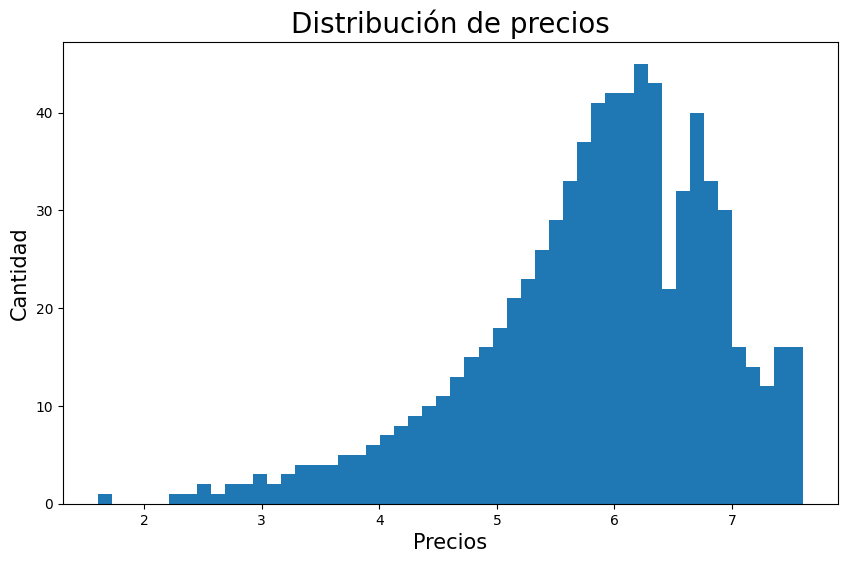

In [20]:
# Se crea el histograma con la distribución de precios.

fig, ax = plt.subplots(figsize=(10, 6))
plt.hist(df_precios.Precios, bins=50)
ax.set_title('Distribución de precios', fontsize=20)
ax.set_xlabel('Precios', fontsize=15)
ax.set_ylabel('Cantidad', fontsize=15)

De este gráfico se puede concluir que entre los precios 5 y 7 se encuentra la mayor cantidad de alojamientos. La distribución de precios presenta una asimetría a la derecha.

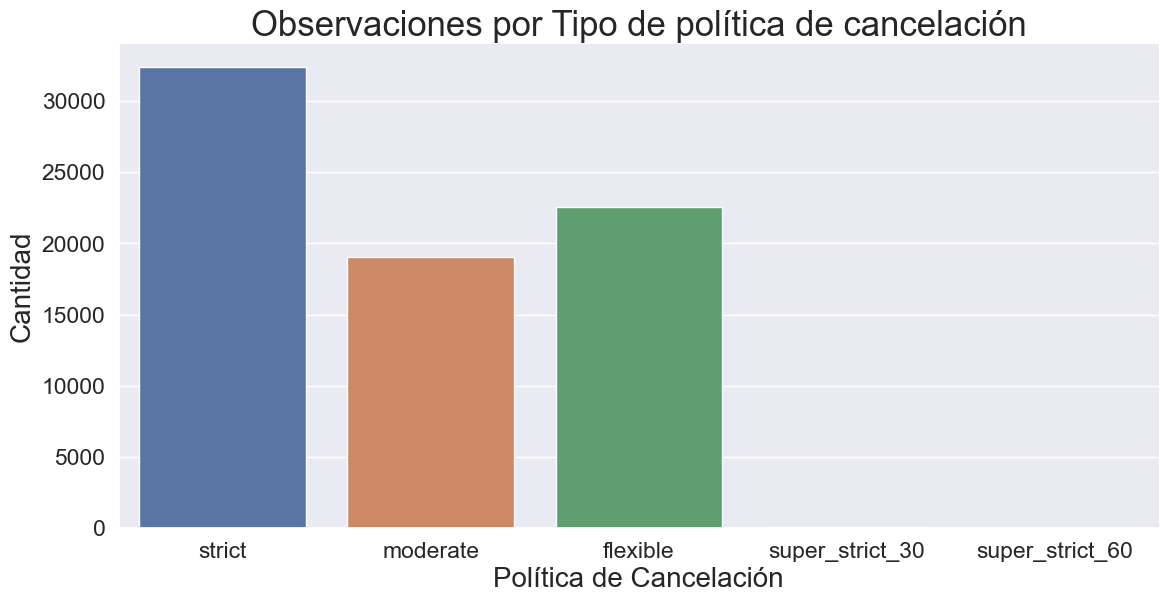

In [21]:
# Se usa con la función "catplot" un gráfico categórico donde el "kind='count'" cuenta el número de 
# observaciones en cada categoría.

sns.set(font_scale=1.5)
sns.catplot(x='cancellation_policy',kind='count',data=df, hue='cancellation_policy', height=6, aspect = 2)
plt.title('Observaciones por Tipo de política de cancelación', fontsize=25)
plt.xlabel('Política de Cancelación', fontsize=20)
plt.ylabel('Cantidad', fontsize=20)
plt.show()

Con respecto a la política de cancelación, se observa un favoritismo por la política ‘strict’, y prácticamente una designación similar entre ‘moderate’ y ‘flexible’. Podemos concluir que tanto la política ‘super_strict_30’ como ‘super_strict_60’ son despreciables.

In [22]:
# Se crea un nuevo df para graficar los tipos de habitaciones con la función "barplot"

df_tipo_habitaciones = df['room_type'].value_counts().reset_index()
df_tipo_habitaciones = df_tipo_habitaciones.rename(columns={'room_type':'Tipo de habitaciones', 'count':'Cantidad'})
df_tipo_habitaciones

,Tipo de habitaciones,Cantidad
0,Entire home/apt,41310
1,Private room,30638
2,Shared room,2162


Se observan muy pocas opciones de Cuarto compartido ‘Shared room’ en la totalidad de alojamientos ofrecidos, predominando el tipo Completo ‘Entire home/apt’ con 41.310 propuestas y el tipo Cuarto privado ‘Private room’ con 30.638 propuestas.

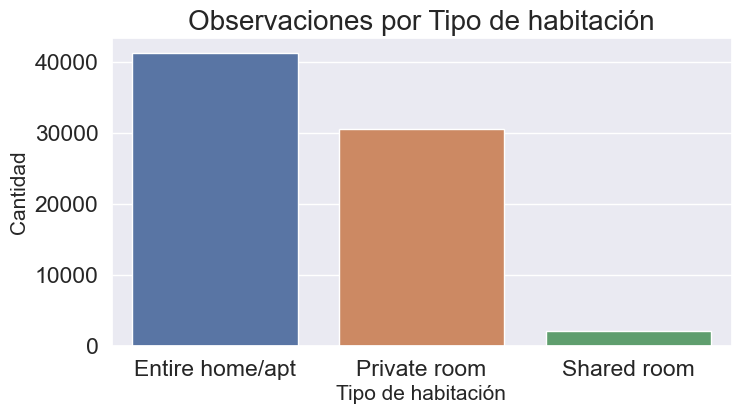

In [23]:
# Se grafica la cantidad de alojamientos en función a los distintos tipos de habitaciones

plt.figure(figsize = (8, 4))
sns.barplot(data=df_tipo_habitaciones, x='Tipo de habitaciones', y='Cantidad', hue='Tipo de habitaciones')
plt.title('Observaciones por Tipo de habitación', fontsize=20)
plt.xlabel('Tipo de habitación', fontsize=15)
plt.ylabel('Cantidad', fontsize=15)
plt.show()

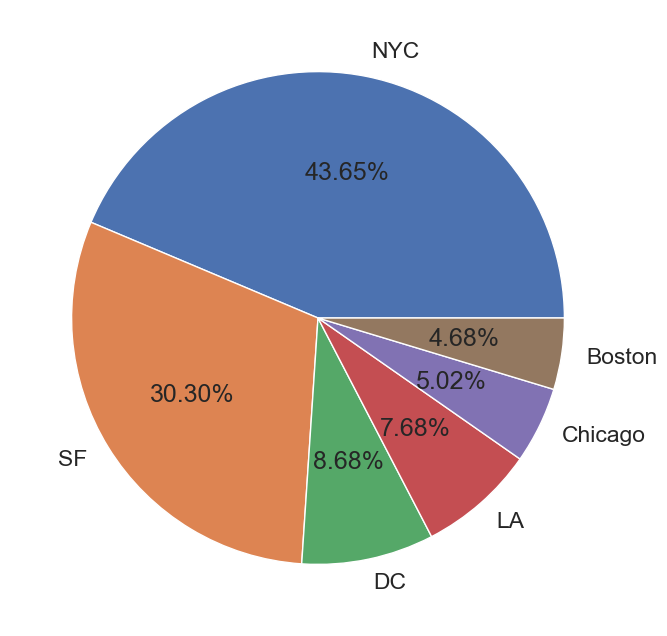

In [24]:
# Se crea un diagrama de torta con la representación de cada Ciudad 'city'

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(list(df.city.value_counts()), labels=list(df.city.unique()), autopct='%.2f%%')
plt.show()

El anterior gráfico muestra la amplia superioridad de ofrecimientos de alojamiento en las ciudades de Nueva York y San Francisco, contemplando prácticamente el 74% del mercado registrado en el Dataset. 

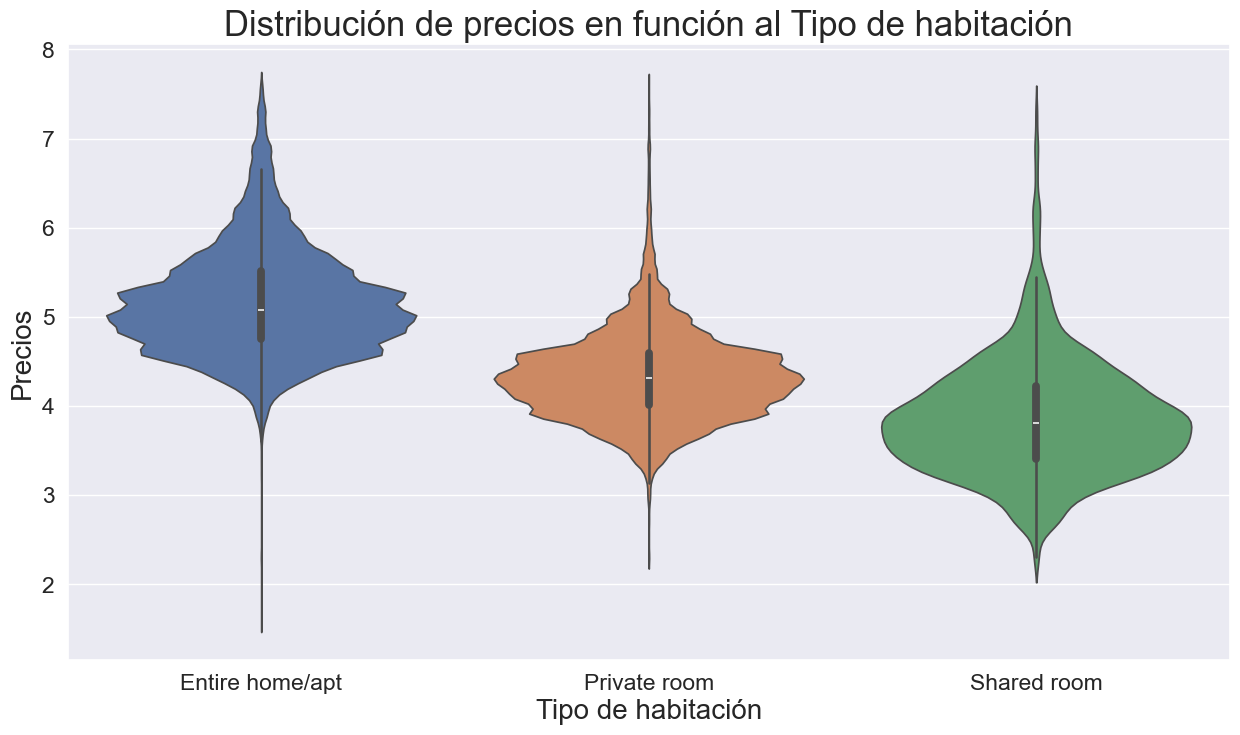

In [25]:
# Se usa con la función "violinplot" un gráfico de la densidad y distribución de precios en función al tipo
# de habitación.

plt.figure(figsize=(15,8))
sns.set(font_scale=1.5)
sns.violinplot(data=df, x='room_type', y='log_price', hue='room_type')
plt.title('Distribución de precios en función al Tipo de habitación', fontsize=25)
plt.xlabel('Tipo de habitación', fontsize=20)
plt.ylabel('Precios', fontsize=20)
plt.show()

En general, el precio más caro lo determina el tipo de habitación:
* si el servicio es Cuarto compartido la mediana es de 3,8 aproximadamente, 
* si el servicio es Cuarto privado la mediana es de 4,4 aproximadamente,
* si el servicio es Completo o Exclusivo la mediana es de 5,1 aproximadamente.

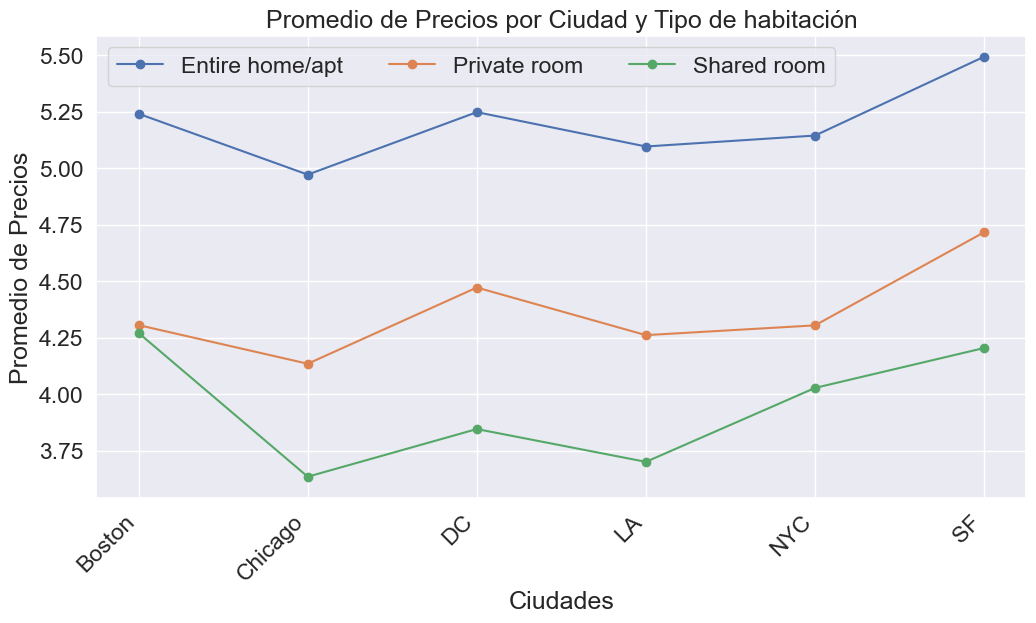

In [26]:
# Se calcula el promedio del precio 'log_price' por tipo de habitación 'room_type' y ciudad 'city'

df_promedio = df[['log_price','room_type','city']].groupby(by=['room_type','city']).mean()
df_promedio = df_promedio.reset_index()

plt.figure(figsize=(12,6))

tipo_habitaciones = df_promedio['room_type'].unique()

for i, tipo_habitaciones in enumerate(tipo_habitaciones):
    data = df_promedio[df_promedio['room_type'] == tipo_habitaciones]
    plt.plot(data['city'], data['log_price'], marker='o', linestyle='-', label=tipo_habitaciones)

plt.title('Promedio de Precios por Ciudad y Tipo de habitación')
plt.ylabel('Promedio de Precios')
plt.xlabel('Ciudades')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper left', ncol=3)
plt.show()

De esta gráfica se puede observar que para cada tipo de habitación, en cada ciudad se respeta el mismo patrón de diferencia:
* aprox. 0,50 entre precios promedios de Cuarto privado y compartido,
* aprox. 1,25 entre Completo (exclusivo) y Cuarto privado.
  
salvo en las ciudades de: 
* Boston: los precios promedios de Cuarto privado y compartido son similares.
* NYC: la diferencia entre los precios promedios de Cuarto privado y compartido no son tan desiguales como en el resto de las ciudades, tan solo de 0,25.
  
Por otra parte, se refleja la diferencia de precios entre ciudades donde SF presenta los precios más elevados y Chicago los más económicos, en promedio.


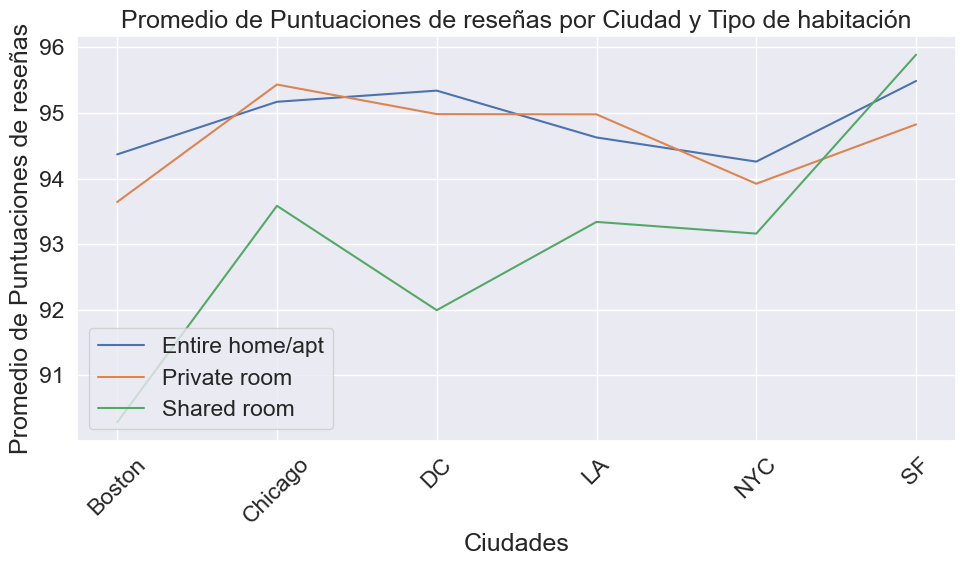

In [27]:
# Se calcula el promedio de la Puntuación de reseñas 'review_scores_rating' por tipo de habitación 
# 'room_type' y ciudad 'city'

df_avg = df[['review_scores_rating','room_type','city']].groupby(by=['room_type','city']).mean()
df_avg.head()

plt.figure(figsize=(10,6))
sns.set(font_scale=1.5)
sns.lineplot(y='review_scores_rating', x='city', hue='room_type', data=df_avg.reset_index())
plt.title('Promedio de Puntuaciones de reseñas por Ciudad y Tipo de habitación')
plt.ylabel('Promedio de Puntuaciones de reseñas')
plt.xlabel('Ciudades')
plt.xticks(rotation=45)
plt.legend(loc='lower left', ncols=1)
plt.tight_layout()
plt.show()

Si se hace el mismo análisis, pero ahora con el promedio de las Reseñas, se manifiesta que en las ciudades de Chicago y LA el patrón del promedio de puntuaciones es similar, presentando una mejor puntuación en habitaciones privadas, le siguen muy pegados los alojamientos completos (exclusivos) y con diferencia más amplia las puntuaciones de las habitaciones compartidas por debajo. 

Sin embargo, este comportamiento cambia para las ciudades de Boston, DC, NYC y SF donde las puntuaciones promedio más altas se evidencian en los alojamientos completos, por debajo las habitaciones privadas y más por debajo aún con las habitaciones compartidas, salvo en la ciudad de SF donde las habitaciones compartidas presentan el mejor promedio de puntuación superando a la privada y a la exclusiva.

Al mismo tiempo, resulta claro que las mejores puntuaciones se observan en la ciudad de SF mientras que Boston muestra las más bajas. 

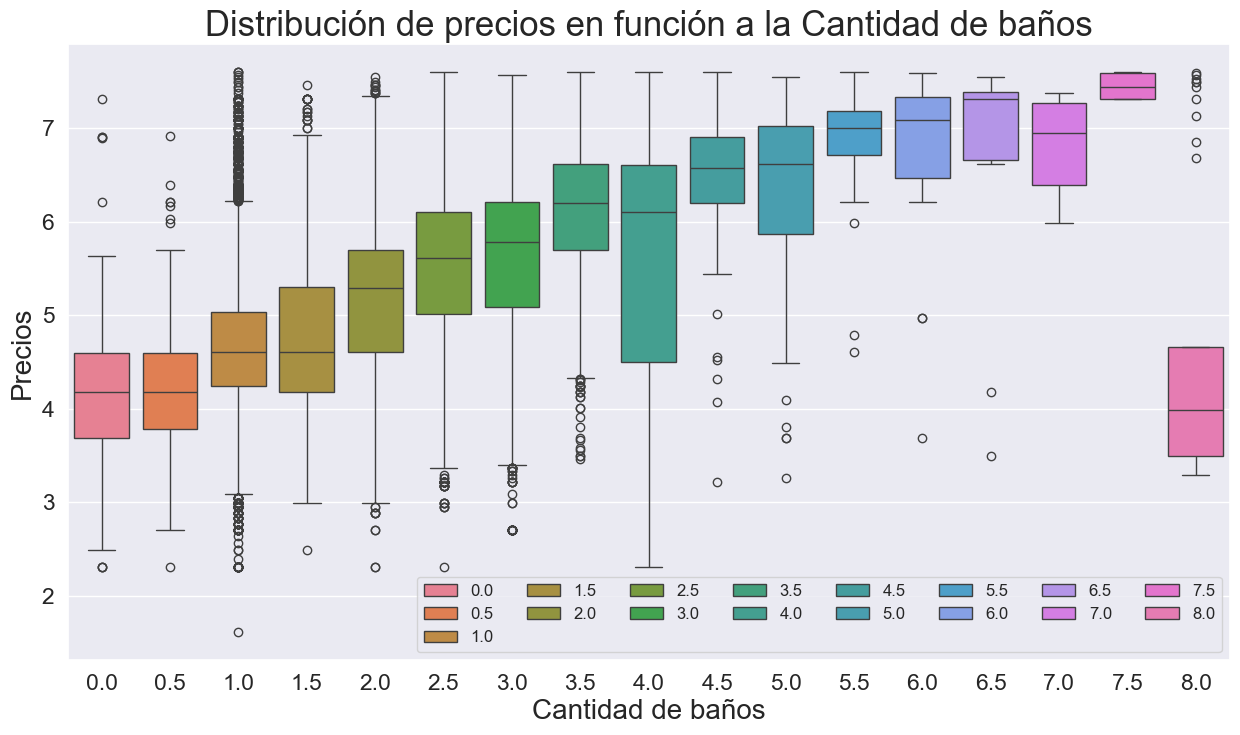

In [28]:
# Se usa con la función "boxplot" un gráfico de la densidad y distribución de precios en función a la 
# cantidad de baños.

# Se define una paleta de colores personalizada donde el número de colores se ajusta automáticamente al 
# número de categorías únicas en la columna 'bedrooms'.
custom_palette = sns.color_palette("husl", n_colors=df['bathrooms'].nunique())

plt.figure(figsize=(15,8))
sns.set(font_scale=1.5)
sns.boxplot(data=df, x='bathrooms', y='log_price', hue='bathrooms', palette=custom_palette)
plt.title('Distribución de precios en función a la Cantidad de baños', fontsize=25)
plt.xlabel('Cantidad de baños', fontsize=20)
plt.ylabel('Precios', fontsize=20)
plt.legend(loc='lower right', ncols=8, fontsize=12)

Del gráfico anterior se deduce que a medida que aumenta la cantidad de baños en los alojamientos, aumentan los precios de los mismos, salvo en alojamientos con 8 baños donde baja sustancialmente a una mediana de precio 4. Para alojamientos con 4 baños, la variabilidad de precios es mayor. 

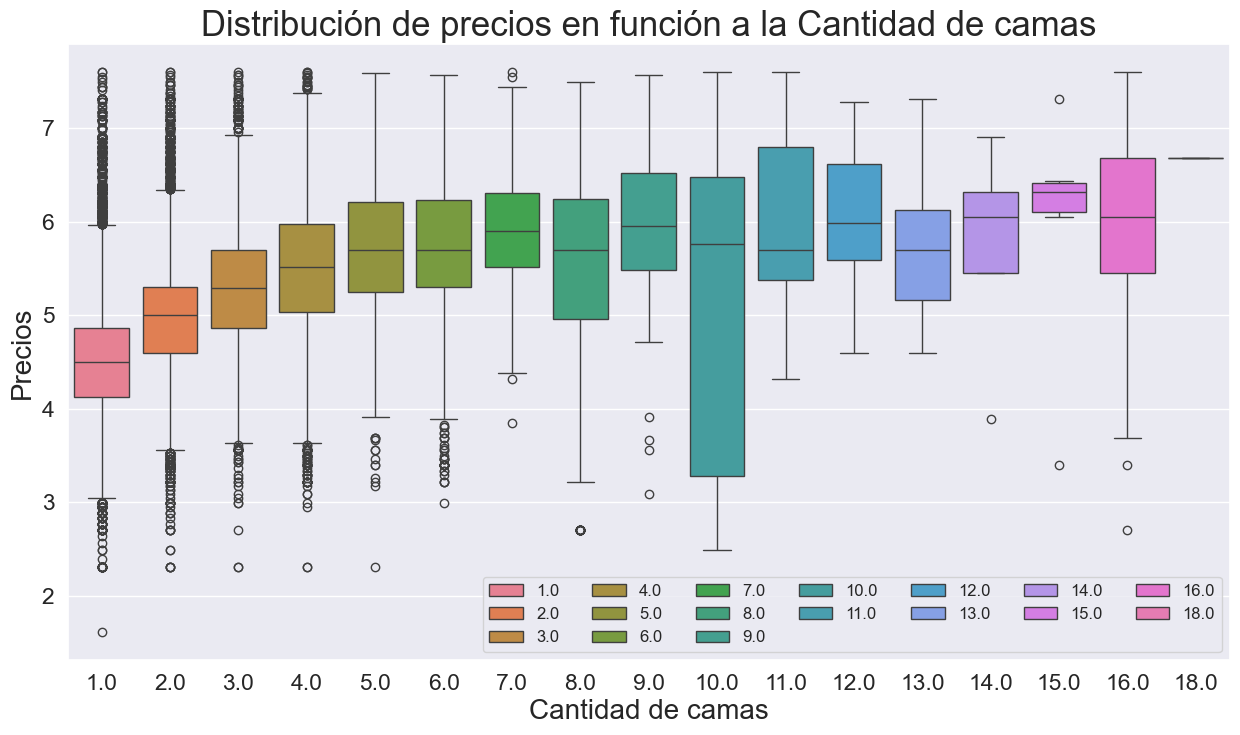

In [29]:
# Se usa con la función "boxplot" un gráfico de la densidad y distribución de precios en función a la 
# cantidad de camas.

# Se define una paleta de colores personalizada donde el número de colores se ajusta automáticamente al 
# número de categorías únicas en la columna 'bedrooms'.
custom_palette = sns.color_palette("husl", n_colors=df['beds'].nunique())

plt.figure(figsize=(15,8))
sns.set(font_scale=1.5)
sns.boxplot(data=df, x='beds', y='log_price', hue='beds', palette=custom_palette)
plt.title('Distribución de precios en función a la Cantidad de camas', fontsize=25)
plt.xlabel('Cantidad de camas', fontsize=20)
plt.ylabel('Precios', fontsize=20)
plt.legend(loc='lower right', ncols=7, fontsize=12)

Del gráfico se resuelve que hasta 5 camas los precios crecen a medida que aumenta la cantidad de camas del alojamiento. Sin embargo, desde 5 camas en adelante, la mediana se mantiene entre los precios 5,5 y 6, excepto en donde los alojamientos tienen 15 camas que la mediana del precio se encuentra entre 6 y 6,5. 

## Análisis de Outliers

In [30]:
col_categoricas = []
col_numericas = []
for column in df.columns:
    
    if df[column].dtypes != "float64" and df[column].dtypes != "int64":
        col_categoricas.append(column)
    else:
        col_numericas.append(column)

In [31]:
col_numericas

['log_price',
 'accommodates',
 'bathrooms',
 'number_of_reviews',
 'review_scores_rating',
 'bedrooms',
 'beds']

In [32]:
col_categoricas

['property_type',
 'room_type',
 'bed_type',
 'cancellation_policy',
 'cleaning_fee',
 'city']

### Variables Numéricas

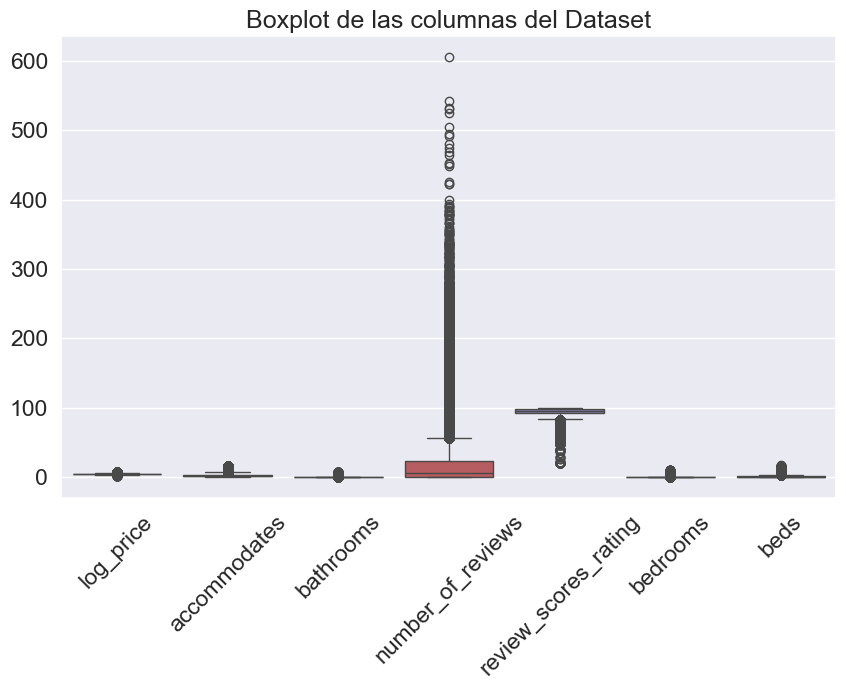

In [33]:
# Se crea un nuevo Dataframe con las variables cuantitativas solamente, eliminando las categóricas.

df_cuantitativas = df.drop(col_categoricas, axis=1)

# Se crea el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data = df_cuantitativas)
plt.title("Boxplot de las columnas del Dataset")
plt.xticks(rotation=45)
plt.show()

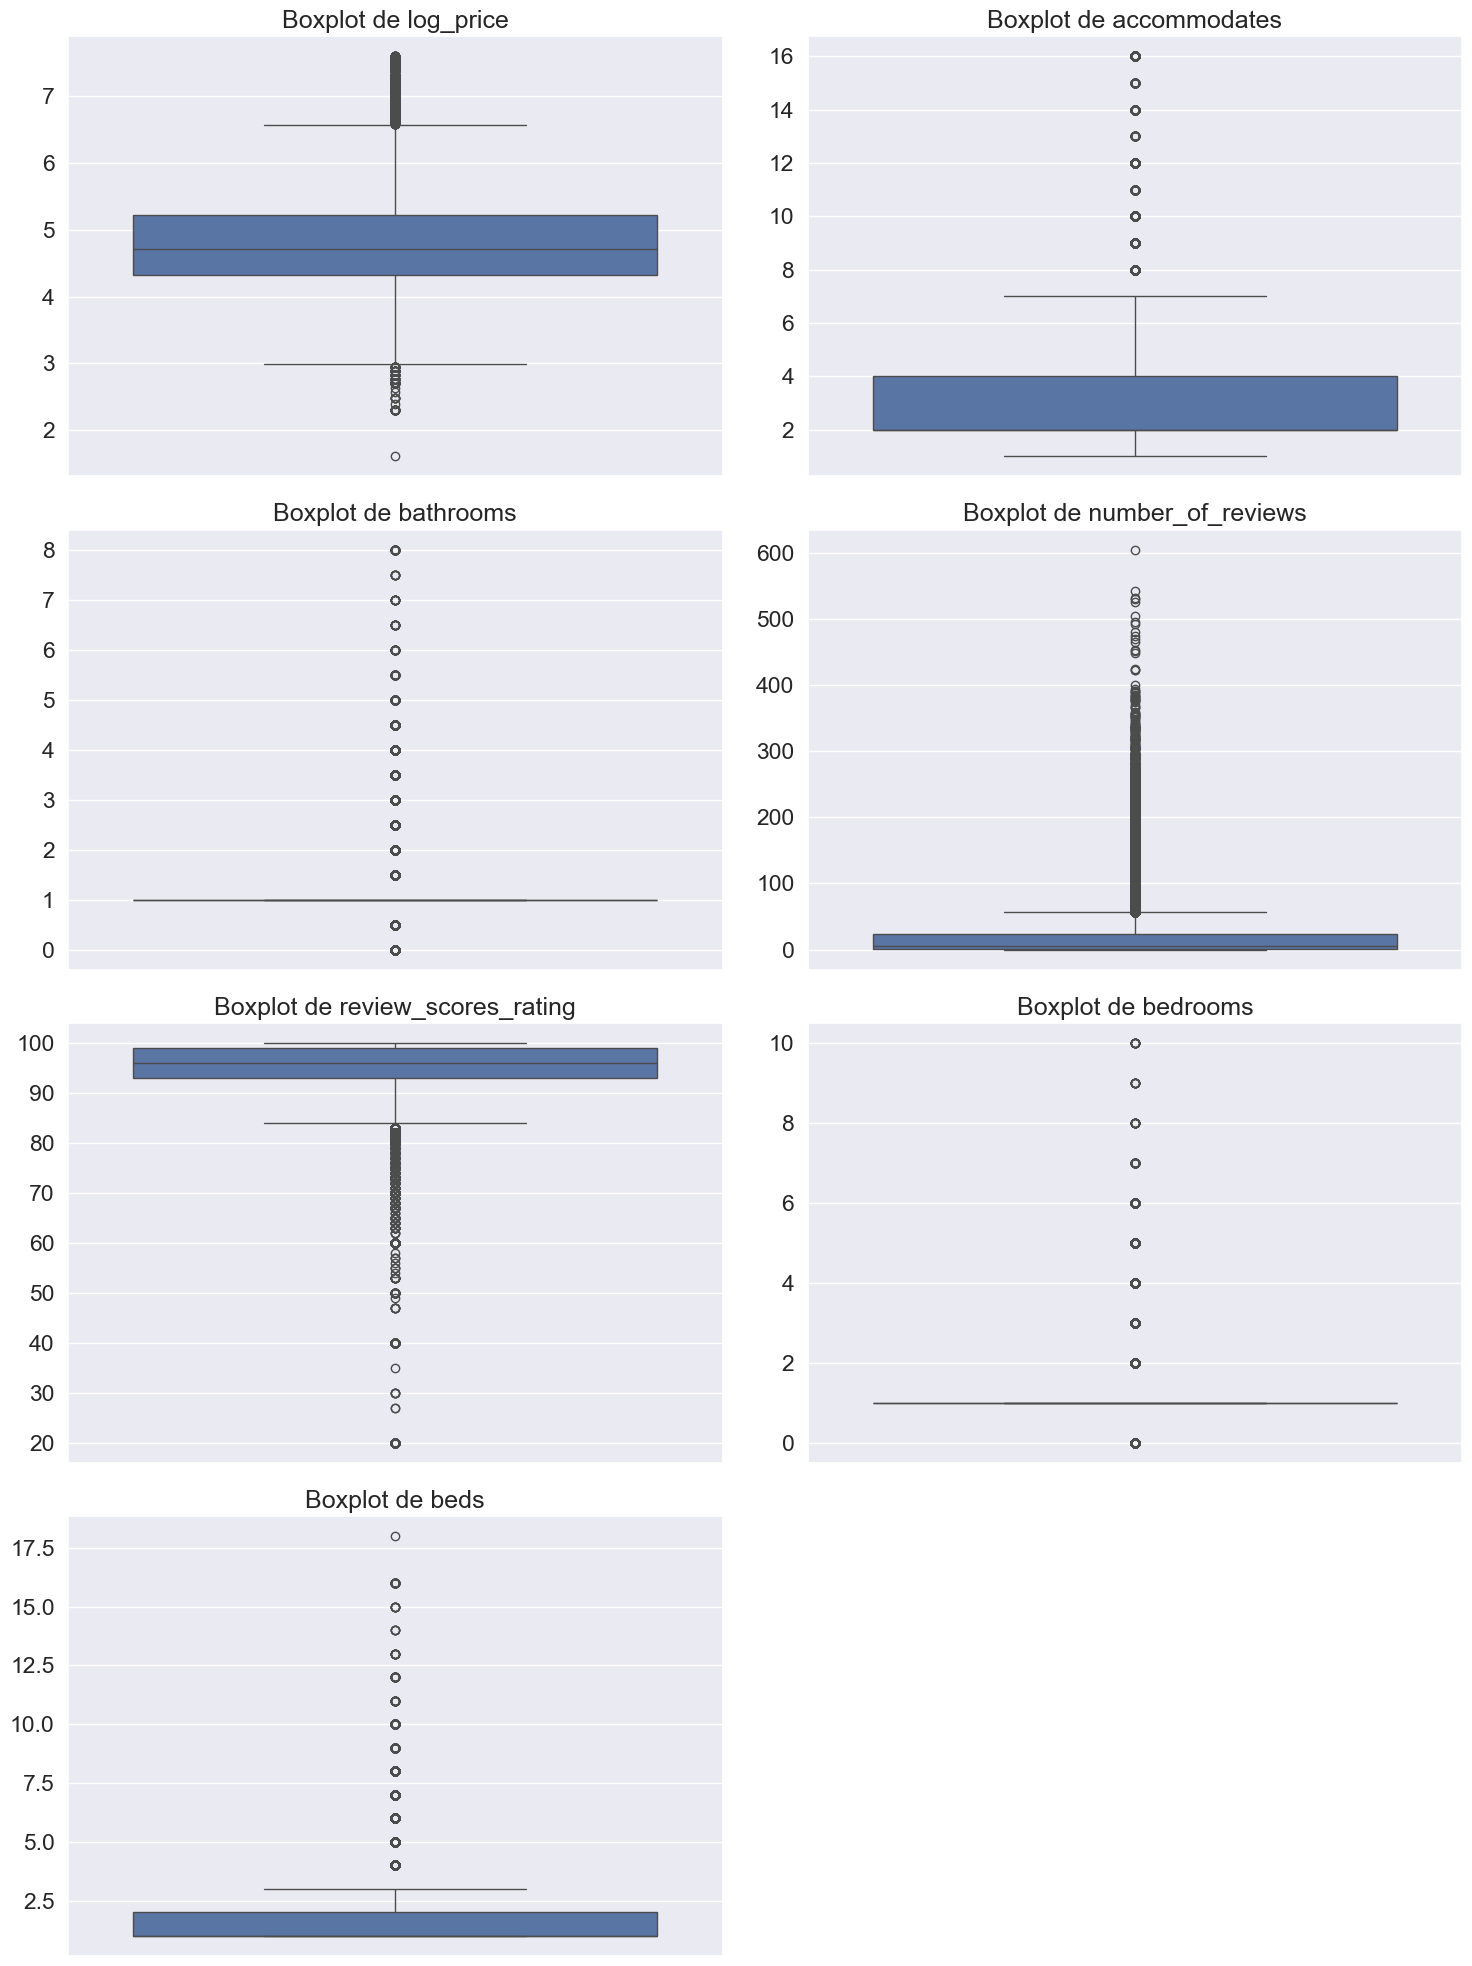

In [34]:
# Se crea subplots individual por cada columna en 4x2

# se calcula el número de filas y columnas
n_cols = len(df_cuantitativas.columns)
n_rows = math.ceil(n_cols / 2)

# se crean los subplots
fig, axes = plt.subplots(n_rows, 2, figsize=(15, 5*n_rows))
axes = axes.flatten() 

# se crean los boxplots
for i, col in enumerate(df_cuantitativas.columns):
    sns.boxplot(data=df_cuantitativas[col], ax=axes[i])
    axes[i].set_title(f'Boxplot de {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# se eliminan los subplots no usados
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [35]:
# creación de la función "traer_outliers" donde se ingresan como parámetros el dataframe "df" y la columna 
# devuelve una lista con los índices de los valores outliers de la columna "col".

def traer_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    limite_inferior = q1 - iqr * 1.5
    limite_superior = q3 + iqr * 1.5

    lista_outliers_col = df.index[(df[col]<limite_inferior) | (df[col]>limite_superior)]

    return lista_outliers_col

In [36]:
# se obtiene la lista de outliers de la columna "number_of_reviews" y "review_scores_rating".

col_eliminar_outliers = ["number_of_reviews", "review_scores_rating"]

lista_outliers = []
for col in col_eliminar_outliers:
    lista_outliers.extend(traer_outliers(df, col))

# se eliminan del dataframe los outliers de la columna "number_of_reviews" y "review_scores_rating".
   
lista_outliers = sorted(set(lista_outliers))
df = df.drop(lista_outliers)

In [37]:
df.shape

(61482, 13)

### Variables Categóricas

In [38]:
# codificación de variables categóricas

df[col_categoricas] = df[col_categoricas].apply(LabelEncoder().fit_transform)
df.head()


,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,number_of_reviews,review_scores_rating,bedrooms,beds
id,,,,,,,,,,,,,
6901257,5.010635,0,0,3,1.0,4,2,1,4,2,100.0,1.0,1.0
6304928,5.129899,0,0,7,1.0,4,2,1,4,6,93.0,3.0,3.0
7919400,4.976734,0,0,5,1.0,4,1,1,4,10,92.0,1.0,3.0
13418779,6.620073,17,0,4,1.0,4,0,1,5,0,96.0,2.0,2.0
12422935,4.442651,0,1,2,1.0,4,2,1,5,3,100.0,1.0,1.0


### Matriz Correlación

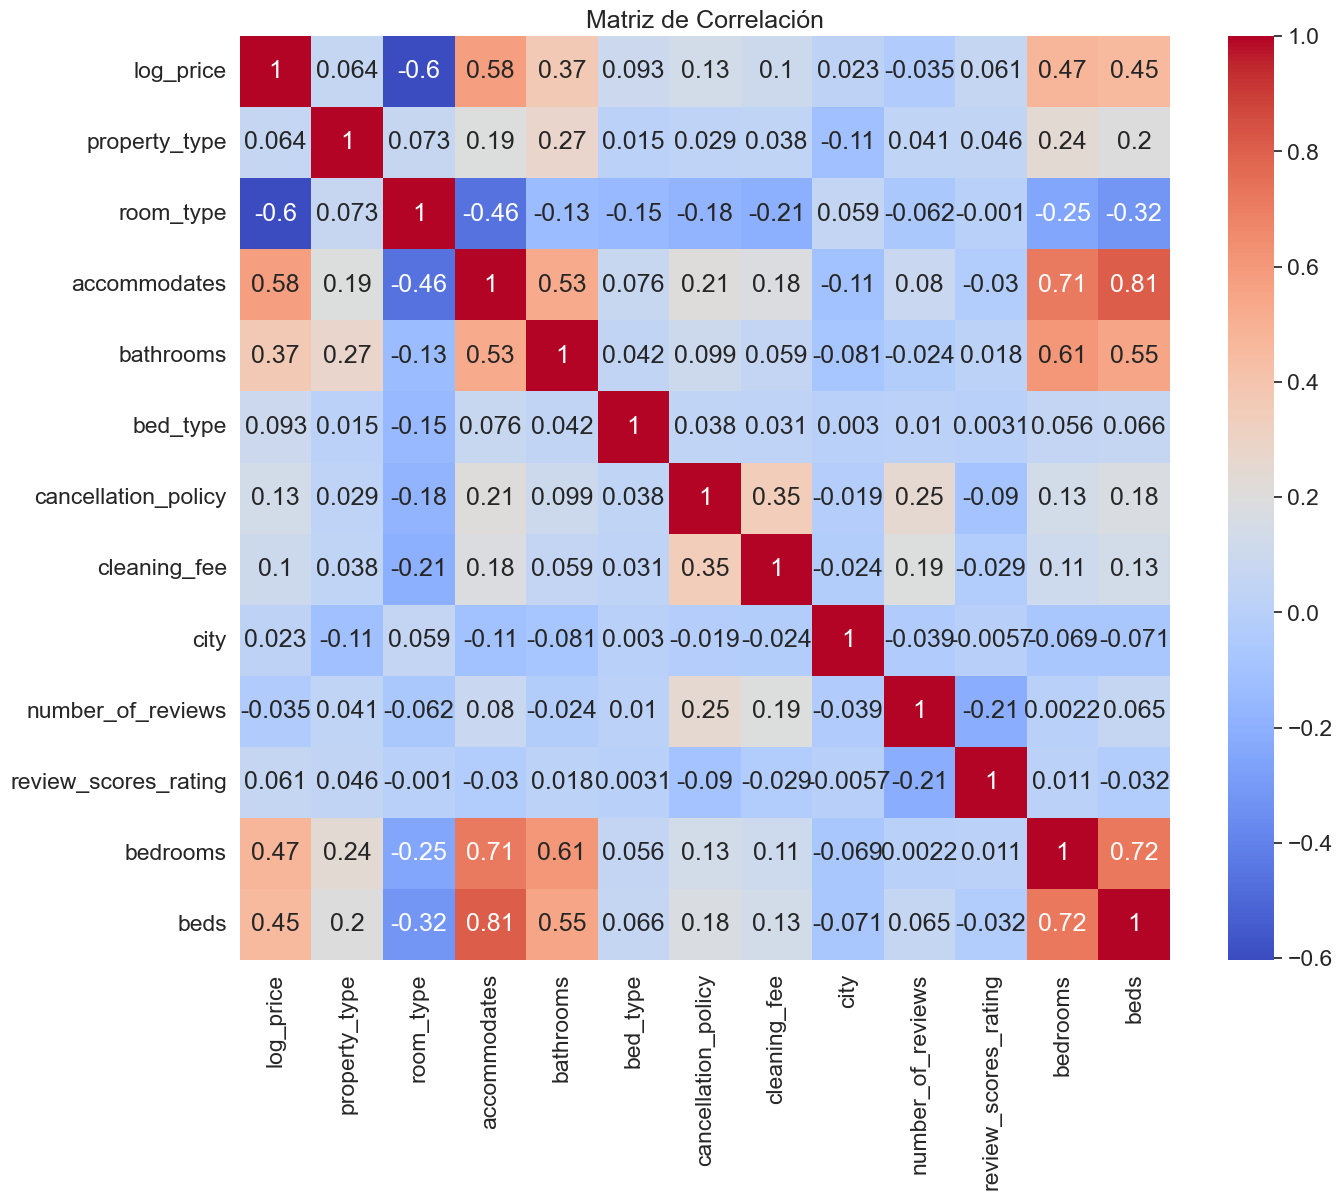

In [39]:
# correlación entre variables
corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

En esta gráfica heatmap se expresa qué correlación tienen todas las variables (columnas) entre si. Para nuestro caso de estudio, se hará foco en la correlación de la variable objetivo a predecir "precio del alojamiento" (log_price) con el resto de las variables. 

Según el análisis se puede determinar que el precio de los alojamientos tiene una correlación con efecto medio de las variables "room_type" (-0,6), "accommodates" (0,58), "bathrooms" (0,37), "bedrooms" (0,47) y "beds" (0,45).

La correlación de la variable "room_type" es negativa o indirecta, mientras que en resto de estas variables la correlación es positiva o directa. Vale aclarar que la variable "room_type" es categórica que fue codificada a numérica para poder aplicarla en el modelado. Cuando el resto de las variables correlacionadas aumentan, aumenta el precio. 

Ninguna variable presenta una correlación fuerte, tanto directa como indirecta, con nuestra variable objetivo.

## Modelado

In [40]:
# se cargan los datos completos

X = df.drop(['log_price'], axis=1)
y = df['log_price']

In [41]:
# se separan los datos para entrenamiento y para testeo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=13)

### Modelo de Regresión Lineal

In [42]:
model_rl = LinearRegression() # se instancia el modelo
model_rl.fit(X_train, y_train) # se entrena
y_pred_rl = model_rl.predict(X_test) # se predice

mae_rl = mean_absolute_error(y_test,y_pred_rl) # se calcula métrica MAE
mse_rl = mean_squared_error(y_test,y_pred_rl) # se calcula métrica MSE
rmse_rl = np.sqrt(mse_rl) # se calcula métrica RMSE
r2_regresión_lineal = r2_score(y_test, y_pred_rl) # se calcula métrica R2

print('El MAE de la Regresión Lineal es ', mae_rl)
print('El MSE de la Regresión Lineal es ', mse_rl)
print('El RMSE de la Regresión Lineal es ', rmse_rl)
print('El r2 de la Regresión Lineal es ', r2_regresión_lineal)

El MAE de la Regresión Lineal es  0.382959967312732
El MSE de la Regresión Lineal es  0.2560943228853749
El RMSE de la Regresión Lineal es  0.5060576280280488
El r2 de la Regresión Lineal es  0.5272532900767104


### Modelo Random Forest

In [43]:
model_rf = RandomForestRegressor() # se instancia el modelo
model_rf.fit(X_train, y_train) # se entrena
y_pred_rf = model_rf.predict(X_test) # se predice

mae_rf = mean_absolute_error(y_test,y_pred_rf) # se calcula métrica MAE
mse_rf = mean_squared_error(y_test,y_pred_rf) # se calcula métrica MSE
rmse_rf = np.sqrt(mse_rf) # se calcula métrica RMSE
r2_rf = r2_score(y_test, y_pred_rf) # se calcula métrica R2

print('El MAE del Modelo Random Forest es ', mae_rf)
print('El MSE del Modelo Random Forest es ', mse_rf)
print('El RMSE del Modelo Random Forest es ', rmse_rf)
print('El r2 del Modelo Random Forest es ', r2_rf)

El MAE del Modelo Random Forest es  0.36690006676607856
El MSE del Modelo Random Forest es  0.2365571647094106
El RMSE del Modelo Random Forest es  0.4863714266991952
El r2 del Modelo Random Forest es  0.5633186239149464


### Modelo KNN

In [44]:
# se instancia el modelo con 
model_knn = KNN(n_neighbors = 5, weights = "uniform", metric = "euclidean") 
model_knn.fit(X_train, y_train) # se entrena
y_pred_knn = model_knn.predict(X_test) # se predice

mae_knn = mean_absolute_error(y_test,y_pred_knn) # se calcula métrica MAE
mse_knn = mean_squared_error(y_test,y_pred_knn) # se calcula métrica MSE
rmse_knn = np.sqrt(mse_knn) # se calcula métrica RMSE
r2_knn = r2_score(y_test, y_pred_knn) # se calcula métrica R2

print('El MAE de la Regresión Lineal es ', mae_knn)
print('El MSE de la Regresión Lineal es ', mse_knn)
print('El RMSE de la Regresión Lineal es ', rmse_knn)
print('El r2 del Modelo KNN es ', r2_knn)

El MAE de la Regresión Lineal es  0.40384471715568204
El MSE de la Regresión Lineal es  0.2807769270717012
El RMSE de la Regresión Lineal es  0.5298838807434146
El r2 del Modelo KNN es  0.481689531419525


### Modelo XGBoost

In [45]:
model_xgb = XGBRegressor(n_estimators= 2000 , max_depth= 6 , learning_rate = 0.01) # se instancia el modelo
model_xgb.fit(X_train, y_train) # se entrena
y_pred_xgb = model_xgb.predict(X_test) # se predice

mae_xgb = mean_absolute_error(y_test,y_pred_xgb) # se calcula métrica MAE
mse_xgb = mean_squared_error(y_test,y_pred_xgb) # se calcula métrica MSE
rmse_xgb = np.sqrt(mse_xgb) # se calcula métrica RMSE
r2_xgb = r2_score(y_test, y_pred_xgb) # se calcula métrica R2

print('El MAE de la Regresión Lineal es ', mae_xgb)
print('El MSE de la Regresión Lineal es ', mse_xgb)
print('El RMSE de la Regresión Lineal es ', rmse_xgb)
print('El r2 del Modelo XGBoost es ', r2_xgb)

El MAE de la Regresión Lineal es  0.3434518550924736
El MSE de la Regresión Lineal es  0.207651398510255
El RMSE de la Regresión Lineal es  0.45568783010988456
El r2 del Modelo XGBoost es  0.616678283412666


# Conclusión del Modelado

Basándonos en las métricas proporcionadas por los cuatro modelos de predicción, podemos dejar sentado que el modelo XGBoost tiene el mejor rendimiento en la comparación, con el R2 más alto donde las variables seleccionadas explican aproximadamente el 61,67% de la variabilidad en los precios.

Conjuntamente, presenta los errores MAE, MSE, RMSE más bajos con un MAE de 0,3435, indicando predicciones más precisas en promedio. 

El RMSE de 0,4557 revela cuán cerca están los datos recolectados de los valores pronosticados del modelo, en otras palabras, los valores predichos se equivocan en +/- 0,4557.

En general podemos deducir que ninguno de los modelos alcanza un R2 muy alto, lo que sugiere que podría haber factores adicionales que afectan el precio y que no están capturados por los modelos.

Se intentó obtener un mejor predictor realizado en un subset definido por aquellos alojamientos donde el tipo de propiedad sean apartamentos o casas únicamente, depurando la cantidad de baños y la cantidad de camas a un valor menor o igual a 3 respectivamente. Sin embargo, los resultados obtenidos de las métricas fueron aún más pobres. Todo el desarrollo de la creación del subset se encuentra al finalizar esta conclusión.  

En definitiva, se elige para predecir los precios de los alojamientos el modelo XGBoost con el dataset completo que se usó para el modelado inicial.

#### Creación de un Subset

Debido a que ninguno de los modelos anteriores ha sido lo suficientemente bueno, se procederá a investigar los outliers no removidos y/o los segmentos específicos de datos con el fin de obtener un rendimiento sustancialmente mejor de los modelos. 

Se procederá entonces a graficar en Boxplot todas las variables. 

##### Visualización y eliminación de Outliers 

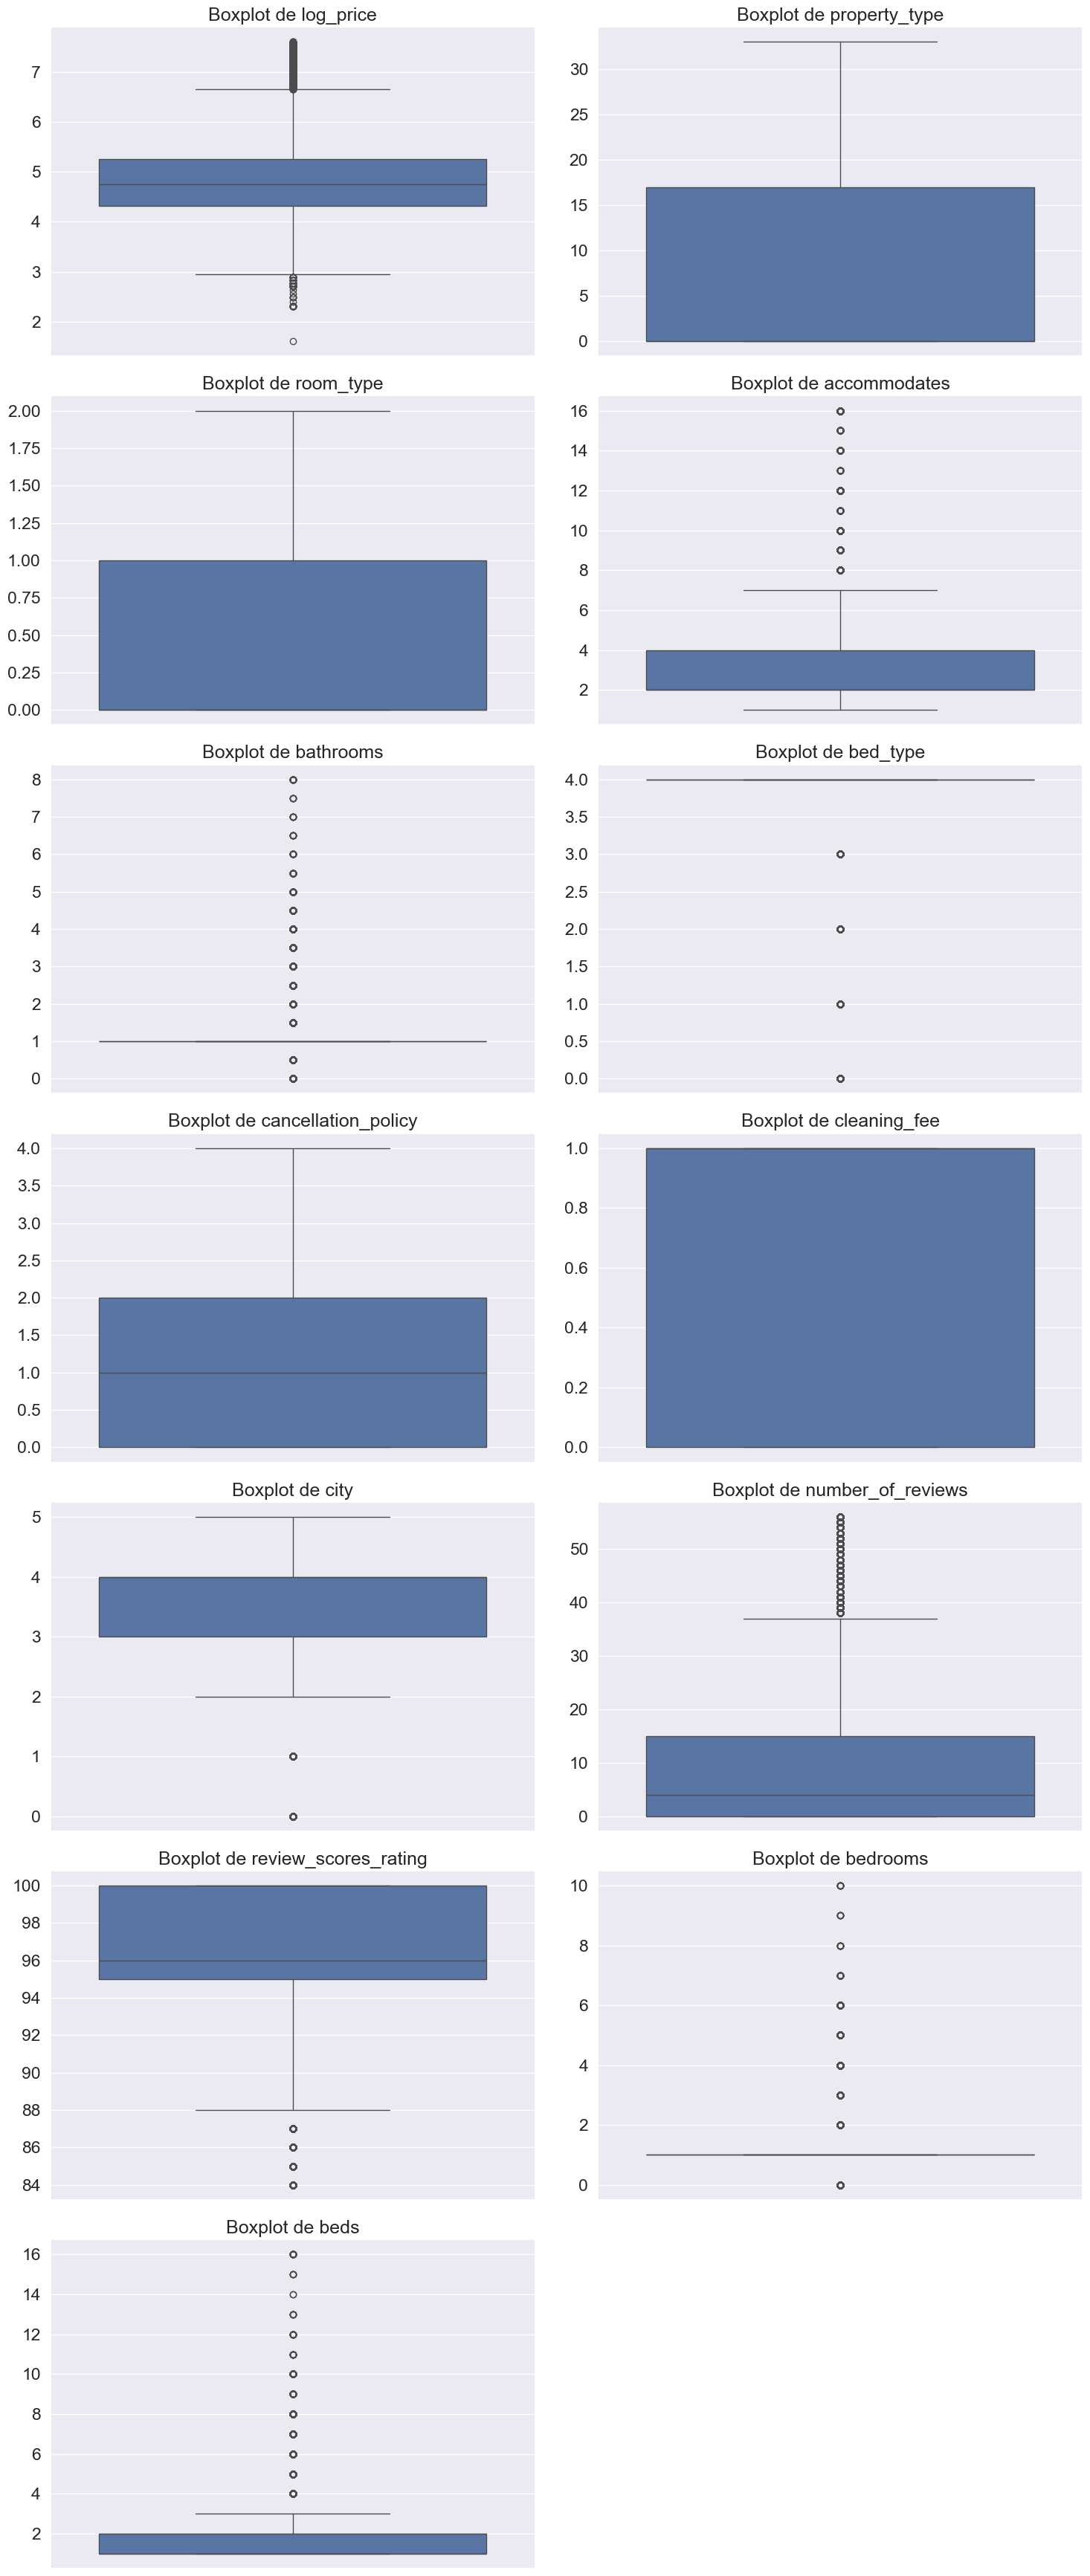

In [46]:
# se calcula el número de filas y columnas
n_cols = len(df.columns)
n_rows = math.ceil(n_cols / 2)

# se crean los subplots
fig, axes = plt.subplots(n_rows, 2, figsize=(15, 5*n_rows))
axes = axes.flatten() 

# se crean los boxplots
for i, col in enumerate(df.columns):
    sns.boxplot(data=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot de {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# se eliminan los subplots no usados
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [47]:
df.shape

(61482, 13)

Se eliminarán los outliers de la columnas "accommodates" y "log_price".

In [48]:
# se obtiene la lista de outliers de la columna "number_of_reviews" y "review_scores_rating".

col_eliminar_outliers = ["accommodates", "log_price"]

lista_outliers = []
for col in col_eliminar_outliers:
    lista_outliers.extend(traer_outliers(df, col))

# se eliminan del dataframe los outliers de la columna "number_of_reviews" y "review_scores_rating".
   
lista_outliers = sorted(set(lista_outliers))
df = df.drop(lista_outliers)

##### Definiendo el Subset  

Ahora se hará un subset "df_n" seleccionando aquellos alojamientos donde el tipo de propiedad (property_type) solamente sean apartamentos (Apartment == 0) o casas (House == 17), y la cantidad de baños (bathrooms) y la cantidad de camas sean menor o igual a 3 respectivamente. En definitiva, se descarta de nuestro dataset inicial las propiedades más grandes con la idea de que sea el motivo de la distorsión del predicto anterior. 

In [49]:
df_n = df
df_n = df_n[df_n['bathrooms'] <= 3.0]
df_n = df_n[df_n['beds'] <= 3.0]
df_n = df_n[(df_n['property_type'] == 0) | (df_n['property_type'] == 17)]

In [50]:
df_n.shape

(49240, 13)

##### Modelado del Subset

In [51]:
# se cargan los datos completos

X = df_n.drop(['log_price'], axis=1)
y = df_n['log_price']

In [52]:
# se separan los datos para entrenamiento y para testeo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=13)

In [53]:
model_rl = LinearRegression() # se instancia el modelo
model_rl.fit(X_train, y_train) # se entrena
y_pred_rl = model_rl.predict(X_test) # se predice

mae_rl = mean_absolute_error(y_test,y_pred_rl) # se calcula métrica MAE
mse_rl = mean_squared_error(y_test,y_pred_rl) # se calcula métrica MSE
rmse_rl = np.sqrt(mse_rl) # se calcula métrica RMSE
r2_regresión_lineal = r2_score(y_test, y_pred_rl) # se calcula métrica R2

print('El MAE de la Regresión Lineal es ', mae_rl)
print('El MSE de la Regresión Lineal es ', mse_rl)
print('El RMSE de la Regresión Lineal es ', rmse_rl)
print('El r2 de la Regresión Lineal es ', r2_regresión_lineal)

El MAE de la Regresión Lineal es  0.3541347617635906
El MSE de la Regresión Lineal es  0.20824786107484114
El RMSE de la Regresión Lineal es  0.45634182481429547
El r2 de la Regresión Lineal es  0.4688865189804604


In [54]:
model_rf = RandomForestRegressor() # se instancia el modelo
model_rf.fit(X_train, y_train) # se entrena
y_pred_rf = model_rf.predict(X_test) # se predice

mae_rf = mean_absolute_error(y_test,y_pred_rf) # se calcula métrica MAE
mse_rf = mean_squared_error(y_test,y_pred_rf) # se calcula métrica MSE
rmse_rf = np.sqrt(mse_rf) # se calcula métrica RMSE
r2_rf = r2_score(y_test, y_pred_rf) # se calcula métrica R2

print('El MAE del Modelo Random Forest es ', mae_rf)
print('El MSE del Modelo Random Forest es ', mse_rf)
print('El RMSE del Modelo Random Forest es ', rmse_rf)
print('El r2 del Modelo Random Forest es ', r2_rf)

El MAE del Modelo Random Forest es  0.3513975914181231
El MSE del Modelo Random Forest es  0.20693660379571244
El RMSE del Modelo Random Forest es  0.4549028509426078
El r2 del Modelo Random Forest es  0.4722307378090993


In [55]:
# se instancia el modelo con 
model_knn = KNN(n_neighbors = 5, weights = "uniform", metric = "euclidean") 
model_knn.fit(X_train, y_train) # se entrena
y_pred_knn = model_knn.predict(X_test) # se predice

mae_knn = mean_absolute_error(y_test,y_pred_knn) # se calcula métrica MAE
mse_knn = mean_squared_error(y_test,y_pred_knn) # se calcula métrica MSE
rmse_knn = np.sqrt(mse_knn) # se calcula métrica RMSE
r2_knn = r2_score(y_test, y_pred_knn) # se calcula métrica R2

print('El MAE de la Regresión Lineal es ', mae_knn)
print('El MSE de la Regresión Lineal es ', mse_knn)
print('El RMSE de la Regresión Lineal es ', rmse_knn)
print('El r2 del Modelo KNN es ', r2_knn)

El MAE de la Regresión Lineal es  0.3790922210030982
El MSE de la Regresión Lineal es  0.23733400199292784
El RMSE de la Regresión Lineal es  0.4871693771091609
El r2 del Modelo KNN es  0.39470548551055074


In [56]:
model_xgb = XGBRegressor(n_estimators= 2000 , max_depth= 6 , learning_rate = 0.01) # se instancia el modelo
model_xgb.fit(X_train, y_train) # se entrena
y_pred_xgb = model_xgb.predict(X_test) # se predice

mae_xgb = mean_absolute_error(y_test,y_pred_xgb) # se calcula métrica MAE
mse_xgb = mean_squared_error(y_test,y_pred_xgb) # se calcula métrica MSE
rmse_xgb = np.sqrt(mse_xgb) # se calcula métrica RMSE
r2_xgb = r2_score(y_test, y_pred_xgb) # se calcula métrica R2

print('El MAE de la Regresión Lineal es ', mae_xgb)
print('El MSE de la Regresión Lineal es ', mse_xgb)
print('El RMSE de la Regresión Lineal es ', rmse_xgb)
print('El r2 del Modelo XGBoost es ', r2_xgb)

El MAE de la Regresión Lineal es  0.32839059940085663
El MSE de la Regresión Lineal es  0.18065184522933797
El RMSE de la Regresión Lineal es  0.425031581449353
El r2 del Modelo XGBoost es  0.5392671508022115
